In [8]:
import numpy as np
import itertools

def square_contains_points(square, points):
    x1, y1, x2, y2 = square
    return all(x1 <= x <= x2 and y1 <= y <= y2 for x, y in points)

def square_contains_at_most_b_points(square, points, max_b_points):
    x1, y1, x2, y2 = square
    count = sum(1 for x, y in points if x1 <= x <= x2 and y1 <= y <= y2)
    return count <= max_b_points

def find_largest_square(a, b, max_b_points):
    points = np.concatenate([a, b], axis=0)
    x_values = sorted(set(points[:, 0]))
    y_values = sorted(set(points[:, 1]))
    
    largest_square = None
    largest_size = 0
    
    for x1, x2 in itertools.combinations(x_values, 2):
        for y1, y2 in itertools.combinations(y_values, 2):
            square = (x1, y1, x2, y2)
            size = (x2 - x1) * (y2 - y1)
            if size > largest_size and square_contains_points(square, a) and square_contains_at_most_b_points(square, b, max_b_points):
                largest_square = square
                largest_size = size
    
    return largest_square


Final_dataset_small2\Amarillo\004270_00_1.jpg
0: 43, 1: 310


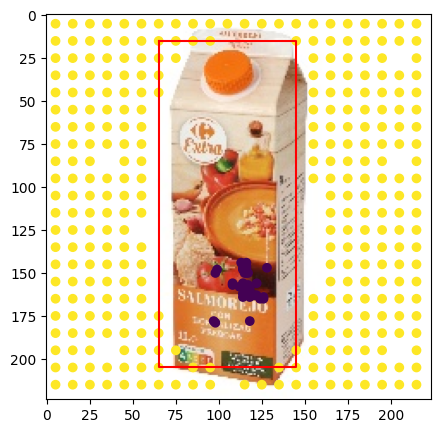

Final_dataset_small2\Amarillo\004270_00_1.npy
Final_dataset_small2\Amarillo\004270_00_1.png
Final_dataset_small2\Amarillo\004270_00_1_2.png
Final_dataset_small2\Amarillo\004270_00_1_labels.npy
Final_dataset_small2\Amarillo\049424_00_1.jpg
0: 5, 1: 294


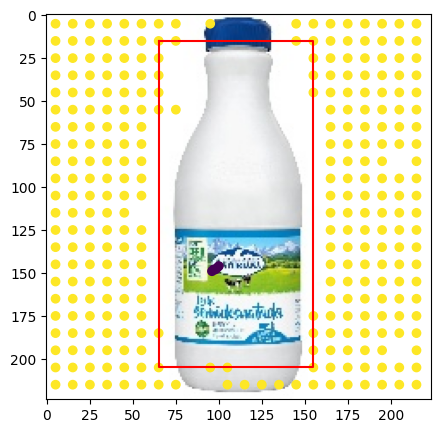

Final_dataset_small2\Amarillo\049424_00_1.npy
Final_dataset_small2\Amarillo\049424_00_1.png
Final_dataset_small2\Amarillo\049424_00_1_2.png
Final_dataset_small2\Amarillo\049424_00_1_labels.npy
Final_dataset_small2\Amarillo\064297_00_1.jpg
0: 9, 1: 293


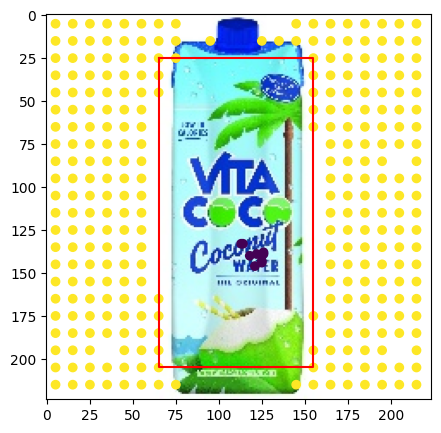

Final_dataset_small2\Amarillo\064297_00_1.npy
Final_dataset_small2\Amarillo\064297_00_1.png
Final_dataset_small2\Amarillo\064297_00_1_labels.npy
Final_dataset_small2\Amarillo\078682_00_1.jpg
0: 19, 1: 290


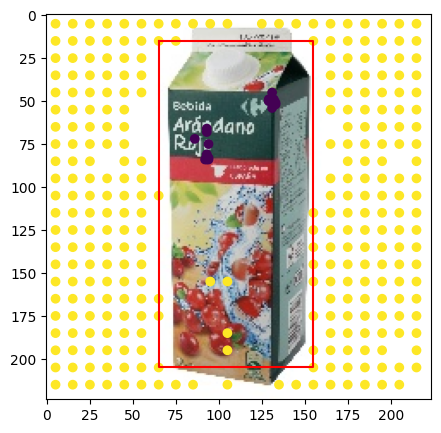

Final_dataset_small2\Amarillo\078682_00_1.npy
Final_dataset_small2\Amarillo\078682_00_1.png
Final_dataset_small2\Amarillo\078682_00_1_labels.npy
Final_dataset_small2\Amarillo\082JOUJWXB91.jpg
0: 2, 1: 264


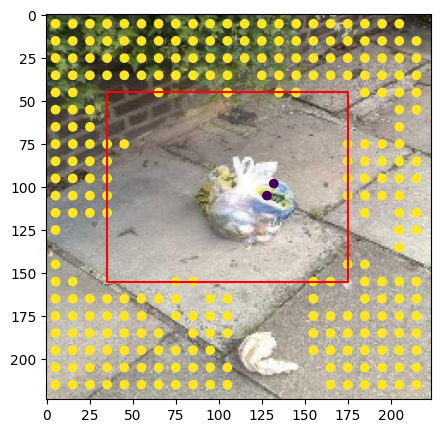

Final_dataset_small2\Amarillo\082JOUJWXB91.npy
Final_dataset_small2\Amarillo\082JOUJWXB91.png
Final_dataset_small2\Amarillo\082JOUJWXB91_2.png
Final_dataset_small2\Amarillo\082JOUJWXB91_labels.npy
Final_dataset_small2\Amarillo\0978_20230331_220020_AMARILLO_NONE.jpg
0: 4, 1: 250


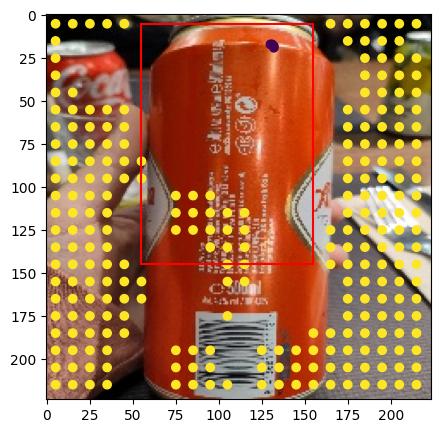

Final_dataset_small2\Amarillo\0978_20230331_220020_AMARILLO_NONE.npy
Final_dataset_small2\Amarillo\0978_20230331_220020_AMARILLO_NONE.png
Final_dataset_small2\Amarillo\0978_20230331_220020_AMARILLO_NONE_2.png
Final_dataset_small2\Amarillo\0978_20230331_220020_AMARILLO_NONE_labels.npy
Final_dataset_small2\Amarillo\0BIPXH89OJOG.jpg
0: 27, 1: 197


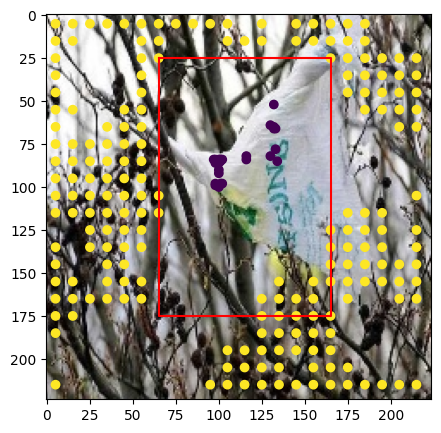

Final_dataset_small2\Amarillo\0BIPXH89OJOG.npy
Final_dataset_small2\Amarillo\0BIPXH89OJOG.png
Final_dataset_small2\Amarillo\0BIPXH89OJOG_2.png
Final_dataset_small2\Amarillo\0BIPXH89OJOG_labels.npy
Final_dataset_small2\Amarillo\0CN8H6A4X643.jpg
0: 16, 1: 114


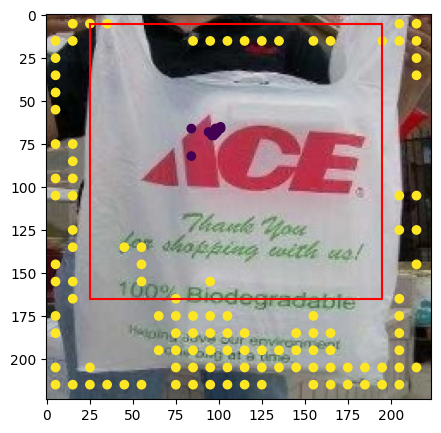

Final_dataset_small2\Amarillo\0CN8H6A4X643.npy
Final_dataset_small2\Amarillo\0CN8H6A4X643.png
Final_dataset_small2\Amarillo\0CN8H6A4X643_2.png
Final_dataset_small2\Amarillo\0CN8H6A4X643_labels.npy
Final_dataset_small2\Amarillo\1100_20230330_195539_AMARILLO_NONE.jpg
0: 12, 1: 295


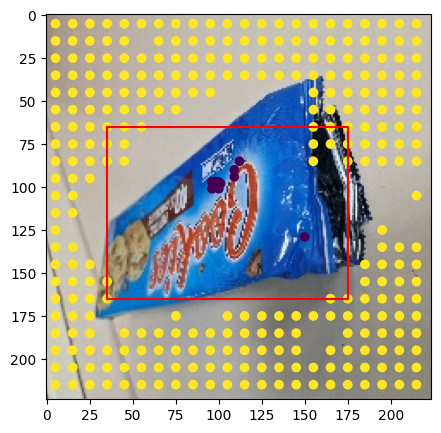

Final_dataset_small2\Amarillo\1100_20230330_195539_AMARILLO_NONE.npy
Final_dataset_small2\Amarillo\1100_20230330_195539_AMARILLO_NONE.png
Final_dataset_small2\Amarillo\1100_20230330_195539_AMARILLO_NONE_2.png
Final_dataset_small2\Amarillo\1100_20230330_195539_AMARILLO_NONE_labels.npy
Final_dataset_small2\Amarillo\1163_20230327_000438_AMARILLO_NONE.jpg
0: 7, 1: 244


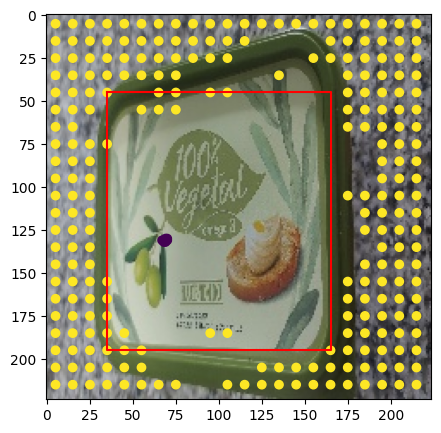

Final_dataset_small2\Amarillo\1163_20230327_000438_AMARILLO_NONE.npy
Final_dataset_small2\Amarillo\1163_20230327_000438_AMARILLO_NONE.png
Final_dataset_small2\Amarillo\1163_20230327_000438_AMARILLO_NONE_2.png
Final_dataset_small2\Amarillo\1163_20230327_000438_AMARILLO_NONE_labels.npy
Final_dataset_small2\Amarillo\1199_20230331_220036_AMARILLO_NONE.jpg


KeyboardInterrupt: 

In [20]:
import os
import cv2
import numpy as np

import matplotlib.pyplot as plt

DIR_IMAGES = 'Final_dataset_small2'
CLASES = os.listdir(DIR_IMAGES)
def load_image(path):
    return cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)

for clase in CLASES:
    directory = os.path.join(DIR_IMAGES, clase)
    for image_name in os.listdir(directory):
        try:
            image_name = os.path.join(directory, image_name)
            print(image_name)
            if not image_name.endswith('.jpg'): continue
            
            image = load_image(image_name)
            points = np.load(image_name.replace('.jpg', '.npy'))
            label = np.load(image_name.replace('.jpg', '_labels.npy'))

            points_ones = points[label==0]
            points_zeros = points[label==1]
            labels_ones = label[label==0]
            labels_zeros = label[label==1]
            square = find_largest_square(points_ones, points_zeros, 20)

            plt.figure(figsize=(5, 5))
            plt.imshow(image)
            plt.scatter(points[:, 0], points[:, 1], c=label)
            x1, y1, x2, y2 = square
            plt.plot([x1, x2, x2, x1, x1], [y1, y1, y2, y2, y1], c='r')
            ones = np.sum(label == 1)
            zeros = np.sum(label == 0)
            print(f'0: {zeros}, 1: {ones}')
            plt.show()
        except Exception as e:
            print(e)

In [4]:
from segment_anything import SamPredictor, sam_model_registry
sam = sam_model_registry["vit_h"](checkpoint="sam_vit_h_4b8939.pth")
sam.to("cuda")

predictor = SamPredictor(sam)

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    # mask_image to binary
    mask_image = mask_image[:, :, 0] > 0
    ax.imshow(mask_image)
    return mask_image

def show_points(coords, labels, ax, marker_size=20):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

In [40]:
def calculate_mask(points, labels, predictor):
    points_ones = points[labels==1]
    points_zeros = points[labels==0]
    square = find_largest_square(points_ones, points_zeros, 30)
    masks, C, low = predictor.predict(multimask_output=False, box = np.array(square))
    points_new = []
    labels_new = []
    for point, label in zip(points[:], labels[:]):
        points_new.append(point)
        #label = 1 - label
        labels_new.append(label)
        
        masks, C, low = predictor.predict(point_coords=np.array(points_new), point_labels=np.array(labels_new), multimask_output=False, mask_input = low,
                                          box = np.array(square))
        masks = masks[0]

    return masks

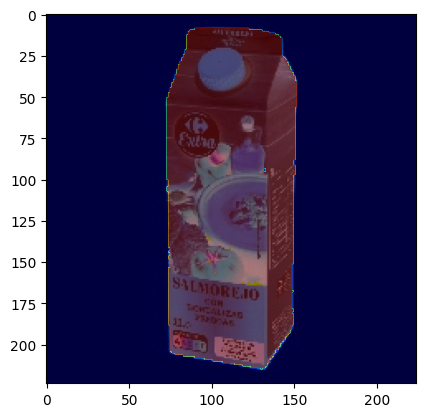

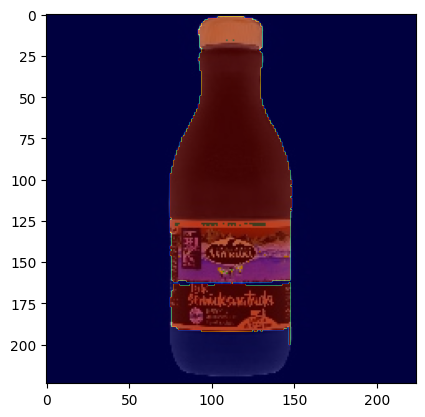

KeyboardInterrupt: 

In [42]:
'''
    Lee todas las imagenes de
'''

DIR_IMAGES = 'Final_dataset_small2'
CLASES = os.listdir(DIR_IMAGES)

def load_image(path):
    return cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)

for clase in CLASES:
    directory = os.path.join(DIR_IMAGES, clase)
    for image_name in os.listdir(directory):
        try:
            if not image_name.endswith('.jpg'): continue
            full_path = os.path.join(directory, image_name)
            img_array = load_image(full_path)
            img = (img_array * 255).astype(np.uint8)
            # Rezie image to 1024x1024
            #img = cv2.resize(img, (1024, 1024))
            # Set image to predictor
            predictor.set_image(img,image_format = 'RGB')

            # Read points and labels
            points = np.load(full_path.replace('.jpg', '.npy').replace('\\', '/'))
            labels = np.load(full_path.replace('.jpg', '_labels.npy').replace('\\', '/'))

            labels = 1 - labels
            
            random_indices = np.random.permutation(len(points))
            points = points[random_indices]
            labels = labels[random_indices]
            
            # Rezie points 224x224 to 1024x1024
            #points = points * 1024/224
            
            mask = calculate_mask(points, labels, predictor)
            # Save mask to png image (mask is a boolean array)
            out_path = os.path.join(full_path.replace('.jpg', '_2.png'))
            mask = (mask.astype(np.uint8) * 255)
            # Resize mask to 224x224
            #mask = cv2.resize(mask, (224, 224))
            cv2.imwrite(out_path, mask)
            plt.imshow(img)
            plt.imshow(mask, alpha=0.5, cmap='jet')
            plt.show()
            #cv2.imshow('mask', mask)
        except Exception as e:
            print(e)

In [49]:
cv2.imwrite('mask.png', 255 - (mask.astype(np.uint8) * 255))

True